# Importing Data

In [1]:
# Install using "pip install surprise"
from surprise import SVD, Dataset, accuracy, BaselineOnly
from surprise.reader import Reader
from surprise.model_selection import cross_validate, GridSearchCV

import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Reader that reads tab-separated data
reader = Reader(sep='\t')
full = Dataset.load_from_file("./data/data.txt", reader=reader)
train = Dataset.load_from_file("./data/train.txt", reader=reader)
test = Dataset.load_from_file("./data/test.txt", reader=reader)

# Training Models, Cross Validation, Test Error

In [38]:
# Create the classifier using the SVD model (not Singular Value Decomposition)
# http://surprise.readthedocs.io/en/stable/matrix_factorization.html

# Train on the training set
clf = SVD(n_factors=20)
clf.fit(train.build_full_trainset())

# Measure the RMSE (root mean squared error) on the training set (E_in) and test set (E_out)
accuracy.rmse(clf.test(train.build_full_trainset().build_testset()))
accuracy.rmse(clf.test(test.build_full_trainset().build_testset()))

RMSE: 0.8439
RMSE: 0.9275


0.9275141057155419

In [34]:
# TODO: Use cross-validation to tweak parameters such as n_factors, regularisation, initial guesses
# GridSearchCV() 
# http://surprise.readthedocs.io/en/stable/model_selection.html
clf = SVD(n_factors=20)
cross_validate(clf, train, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9406  0.9392  0.9395  0.9322  0.9409  0.9385  0.0032  
Fit time          3.81    3.87    3.93    3.74    2.30    3.53    0.62    
Test time         0.25    0.26    0.22    0.18    0.13    0.21    0.05    


{'fit_time': (3.8101556301116943,
  3.874810218811035,
  3.9334514141082764,
  3.7384836673736572,
  2.3011441230773926),
 'test_rmse': array([0.94060079, 0.93915055, 0.93950253, 0.93220324, 0.94087576]),
 'test_time': (0.25360941886901855,
  0.25711774826049805,
  0.21852493286132812,
  0.17943072319030762,
  0.128326416015625)}

# Training on Full Dataset, Getting Matrices

In [221]:
# Using the optimized parameters from cross-validation, we fit on the entire training set/
clf = SVD(n_factors=20)
clf.fit(full.build_full_trainset())

In [222]:
# Get the coefficient matrices and check their shapes
U = clf.pu # User coeffs
V = clf.qi # Movie coeffs
print(U.shape)
print(V.shape)

(943, 20)
(1682, 20)


# SVD and Projection

In [223]:
# Do SVD (singular value decomposition) on the matrices
A, Sigma, B = np.linalg.svd(V, full_matrices=False) # V = A @ np.diag(Sigma) @ B 
print(V.shape)
print(A.shape)
print(np.diag(Sigma).shape)
print(B.shape)

(1682, 20)
(1682, 20)
(20, 20)
(20, 20)


In [224]:
# Take the first 2 rows(?) of A
A_red = A[:2, :]
print(A_red.shape)

# Multiply with V to reduce V from 20 dim to 2 dim
V_red = (V @ A_red.T)
print(V_red.shape)
print(V_red)

(2, 20)
(1682, 2)
[[-0.00903465 -0.00827802]
 [ 0.00119299  0.00941919]
 [ 0.01146579 -0.004782  ]
 ...
 [-0.0046568   0.00583735]
 [ 0.01367911  0.00365619]
 [ 0.00718788  0.00856975]]


# Visualization

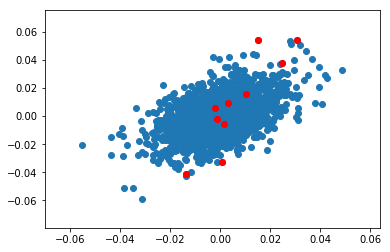

In [225]:
# Scatter the 2 dimensions of the reduced V
plt.scatter(V_red[:, 0], V_red[:, 1])

# Top 10 most popular movies
for i in [50, 258, 100, 181, 294, 286, 288, 1, 300, 121]:
    plt.scatter(V_red[clf.trainset.to_inner_iid(str(i)), 0], V_red[clf.trainset.to_inner_iid(str(i)), 1], c='r')

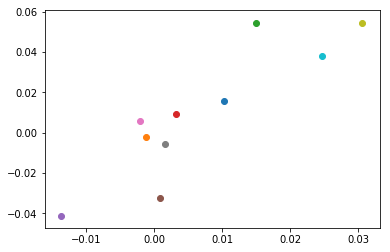

In [226]:
# TODO: Copy the code from the basic visualization that allowed us sort the movies so that we can subselect the relevant
# subsets of the movies.
for i in [50, 258, 100, 181, 294, 286, 288, 1, 300, 121]:
    plt.scatter(V_red[clf.trainset.to_inner_iid(str(i)), 0], V_red[clf.trainset.to_inner_iid(str(i)), 1])